# Global Wine Markets 2014 to 2016

## 📖 Background

With the end of year holidays approaching, many people like to relax or party with a glass of wine. That makes wine an important industry in many countries. Understanding this market is important to the livelihood of many people. 

You work at a multinational consumer goods organization that is considering entering the wine production industry. Managers at your company would like to understand the market better before making a decision.

## 💾 The data

This dataset is a subset of the University of Adelaide's [Annual Database of Global Wine Markets](https://universityofadelaide.app.box.com/s/eqpjqyq8o3mfy7139cr4pn76iolr1o1w).

The dataset consists of a single CSV file, `data/wine.csv`.

Each row in the dataset represents the wine market in one country. There are 34 metrics for the wine industry covering both the production and consumption sides of the market.

## 💪 Challenge

Explore the dataset to understand the global wine market. Your published notebook should contain a short report on the state of the market, including summary statistics, visualizations, and text describing any insights you found.

# Introduction

The dataset used for this analysis comprises information on 52 countries, covering 36 features related to the wine market. Key features include:
- Region: The geographic region where the country is located (e.g., Western Europe, North America).
- Country: The name of the country.
- Vine Area ('000 ha): The area of land dedicated to vineyards in thousands of hectares.
- Cropland under vines (%): The percentage of total cropland that is under vine cultivation.
- Wine produced (ML): The volume of wine produced in millions of liters.
- Wine consumed (ML): The volume of wine consumed in millions of liters.
- Wine consumed (l/capita): The volume of wine consumed per capita in liters.
- Wine expenditure (US\$m 2015): The total expenditure on wine in 2015 US dollars.
- Per capita wine expenditure (US\$ 2015): The per capita expenditure on wine in 2015 US dollars.
- Population (millions): The population of the country in millions.
- GDP (billion US\$ real 1990): The Gross Domestic Product of the country in billion US dollars, adjusted to 1990 values.
- GDP per capita ('000 US$): The GDP per capita in thousand US dollars.
- Wine export vol. (ML): The volume of wine exported in millions of liters.
- Wine import vol. (ML): The volume of wine imported in millions of liters.
- Value of wine exports (US\$ mill): The total value of wine exports in million US dollars.
- Value of wine imports (US\$ mill): The total value of wine imports in million US dollars.
- Bottled still wine exports (ML): The volume of bottled still wine exported in millions of liters.
- Bottled still wine imports (ML): The volume of bottled still wine imported in millions of liters.
- Sparkling wine exports (ML): The volume of sparkling wine exported in millions of liters.
- Sparkling wine imports (ML): The volume of sparkling wine imported in millions of liters.
- Bulk wine exports (ML): The volume of bulk wine exported in millions of liters.
- Bulk wine imports (ML): The volume of bulk wine imported in millions of liters.
- Unit value exports (US\$/litre): The average value per liter of wine exports in US dollars.
- Unit value imports (US\$/litre): The average value per liter of wine imports in US dollars.
- % of global prod'n volume: The percentage of the global production volume contributed by the country.
- % of global cons'n volume: The percentage of the global consumption volume contributed by the country.
- % of '15 global wine expend.: The percentage of the global wine expenditure in 2015 contributed by the country.
- Wine as % of alcohol cons'n volume: The percentage of wine in the total alcohol consumption volume.
- Exports as % of prod'n volume: The percentage of wine production volume that is exported.
- Imports as % of cons'n volume: The percentage of wine consumption volume that is imported.
- Wine self- suff. (%): The percentage of wine consumption that is met by domestic production.
- % of world export volume: The percentage of the world export volume contributed by the country.
- % of world export value: The percentage of the world export value contributed by the country.
- % of world import volume: The percentage of the world import volume contributed by the country.
- % of world import value: The percentage of the world import value contributed by the country.
- Index of wine comp. advant.: An index measuring the comparative advantage of the country in wine production and trade.

This dataset also includes demographic and economic indicators such as population size, GDP, and GDP per capita, providing additional context for understanding the wine market dynamics.

The analysis will proceed with data preparation, exploratory data analysis (EDA), market segmentation, geographic analysis, and competitive analysis. The goal is to uncover trends, patterns, and insights that can inform strategic decisions regarding the potential entry into the wine production industry.

The aim is to identify key market segments, understand regional differences in wine production and consumption, and evaluate the competitive landscape. This will enable the organization to make informed decisions and develop targeted strategies for entering and succeeding in the global wine market.

# Imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import geopandas as gpd
import folium
from folium.plugins import HeatMap


pd.set_option('display.float_format', '{:,.2f}'.format)

In [7]:
wine = pd.read_csv("data/wine.csv")

# Data Preparation

In [56]:
# Load the dataset
file_path = 'data/wine.csv'
wine_data = pd.read_csv(file_path)

# Display the initial dataset information
print("Initial Dataset Information:")
wine_data.info()

# Handle missing values
# Use SimpleImputer to fill missing numerical values with the mean
imputer = SimpleImputer(strategy='mean')
wine_data_imputed = pd.DataFrame(imputer.fit_transform(wine_data.select_dtypes(include=['float64'])), columns=wine_data.select_dtypes(include=['float64']).columns)

# For categorical columns, we will fill missing values with the mode (most frequent value)
wine_data_categorical = wine_data.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))

# Combine the imputed numerical data and categorical data
wine_data_cleaned = pd.concat([wine_data_categorical, wine_data_imputed], axis=1)

# Duplicated to preserve nominal figures
df = wine_data_cleaned.copy()

# Standardize numerical features
scaler = StandardScaler()
numerical_features = wine_data_cleaned.select_dtypes(include=['float64']).columns
wine_data_cleaned[numerical_features] = scaler.fit_transform(wine_data_cleaned[numerical_features])

# Save the cleaned dataset for future use
cleaned_file_path = 'data/cleaned_wine_data.csv'
wine_data_cleaned.to_csv(cleaned_file_path, index=False)


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region                                  52 non-null     object 
 1   Country                                 52 non-null     object 
 2   Vine Area ('000 ha)                     52 non-null     float64
 3   Cropland under vines (%)                50 non-null     float64
 4   Wine produced (ML)                      40 non-null     float64
 5   Wine consumed (ML)                      52 non-null     float64
 6   Wine consumed (l/capita)                51 non-null     float64
 7   Wine expenditure (US$m 2015)            51 non-null     float64
 8   Per capita wine expenditure (US$ 2015)  51 non-null     float64
 9   Population (millions)                   51 non-null     float64
 10  GDP (billion US$ real 1990)        

# EDA

In [105]:
summary_stats = df.describe()
summary_stats

,Vine Area ('000 ha),Cropland under vines (%),Wine produced (ML),Wine consumed (ML),Wine consumed (l/capita),Wine expenditure (US$m 2015),Per capita wine expenditure (US$ 2015),Population (millions),GDP (billion US$ real 1990),GDP per capita ('000 US$),...,Imports as % of cons'n volume,Wine self- suff. (%),% of world export volume,% of world export value,% of world import volume,% of world import value,Index of wine comp. advant.,Cluster,Production Market Share (%),Consumption Market Share (%)
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,...,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00
mean,145.98,1.62,721.02,474.25,14.84,"5,559.08",161.36,143.10,"1,290.25",16.36,...,60.30,116.12,1.91,1.92,1.87,1.94,2.88,0.21,1.92,1.92
std,241.26,2.51,"1,084.36",720.05,13.47,"9,437.35",167.04,320.94,"2,868.35",8.80,...,62.52,107.12,4.54,4.91,3.20,3.30,5.90,0.57,2.89,2.92
min,0.00,0.00,4.17,4.97,0.02,287.10,0.25,4.01,20.14,3.81,...,0.04,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02
25%,7.65,0.06,77.35,63.41,1.45,718.49,22.87,9.48,139.51,9.26,...,10.64,59.60,0.04,0.03,0.10,0.10,0.07,0.00,0.21,0.26
50%,43.90,0.46,432.70,223.42,13.35,"1,775.67",101.84,32.82,380.29,16.36,...,34.42,104.65,0.20,0.22,0.56,0.70,0.43,0.00,1.15,0.91
75%,134.58,1.92,721.02,432.25,23.18,"4,757.66",278.36,93.22,"1,290.25",24.27,...,100.70,116.12,1.02,1.42,2.03,2.25,2.88,0.00,1.92,1.75
max,975.67,9.63,"4,905.17","3,390.19",44.28,"41,822.45",658.63,"1,375.94","15,104.21",34.68,...,287.01,564.29,22.07,28.75,14.25,17.08,27.40,2.00,13.08,13.75


In [106]:
frequency_distribution = wine_data_cleaned.describe(include=['object'])
print("\nFrequency Distribution for Categorical Columns:")
print(frequency_distribution)


Frequency Distribution for Categorical Columns:
       Region Country
count      52      52
unique      8      52
top       WEM  France
freq       12       1


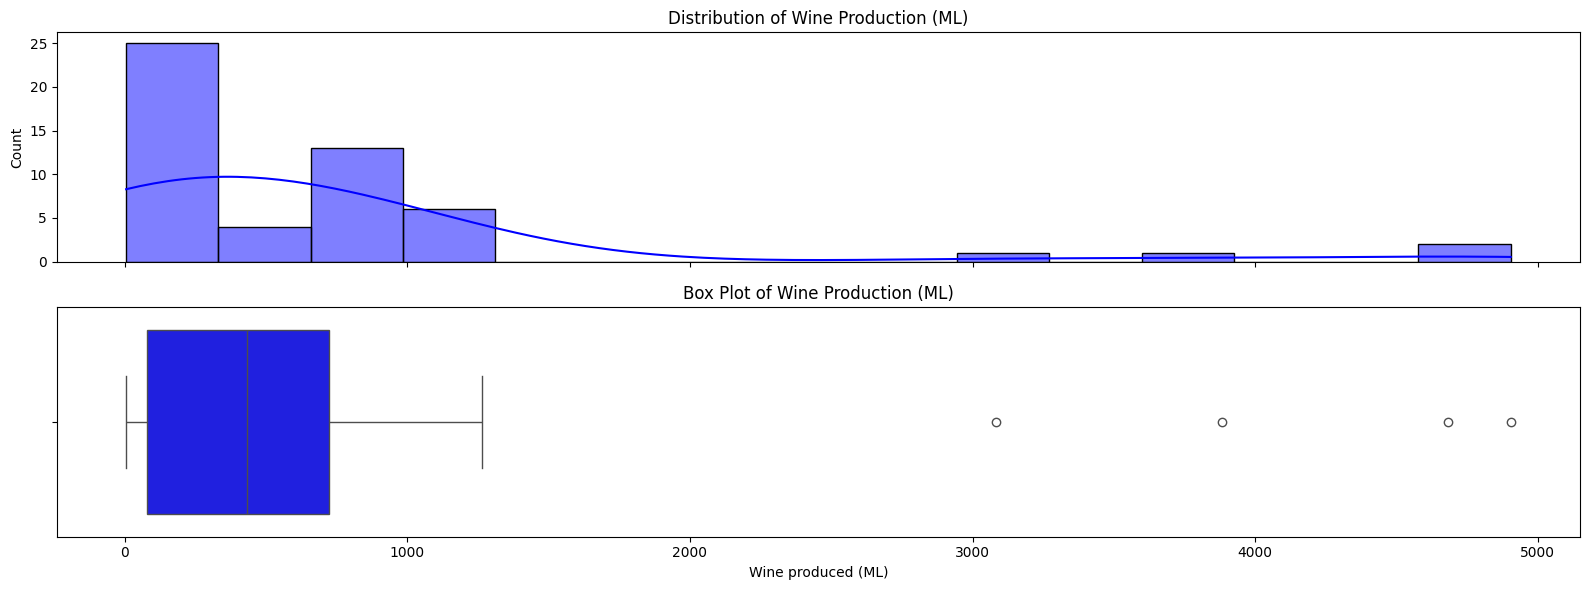

In [111]:
fig, axs = plt.subplots(2, 1, figsize = (16, 6), sharex = True)

sns.histplot(df['Wine produced (ML)'], kde=True, color='blue', ax = axs[0])
axs[0].set_title('Distribution of Wine Production (ML)')

sns.boxplot(data = df, x = 'Wine produced (ML)', color='blue', ax = axs[1])
axs[1].set_title('Box Plot of Wine Production (ML)')

plt.tight_layout()

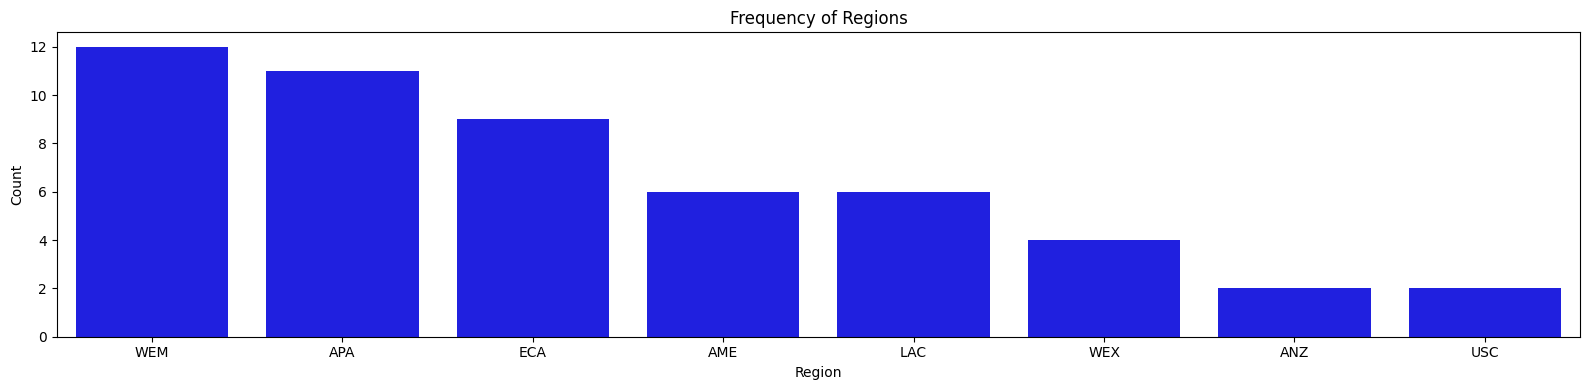

In [112]:
# Histogram and boxplot of wine production
plt.figure(figsize=(16, 4))
tmp = df.groupby('Region')['Wine produced (ML)'].count().sort_values(ascending = False).reset_index()
tmp.columns = ['Region', 'Count']
sns.barplot(data = tmp, x = 'Region', y = 'Count', color='blue')
plt.title('Frequency of Regions')
plt.tight_layout()

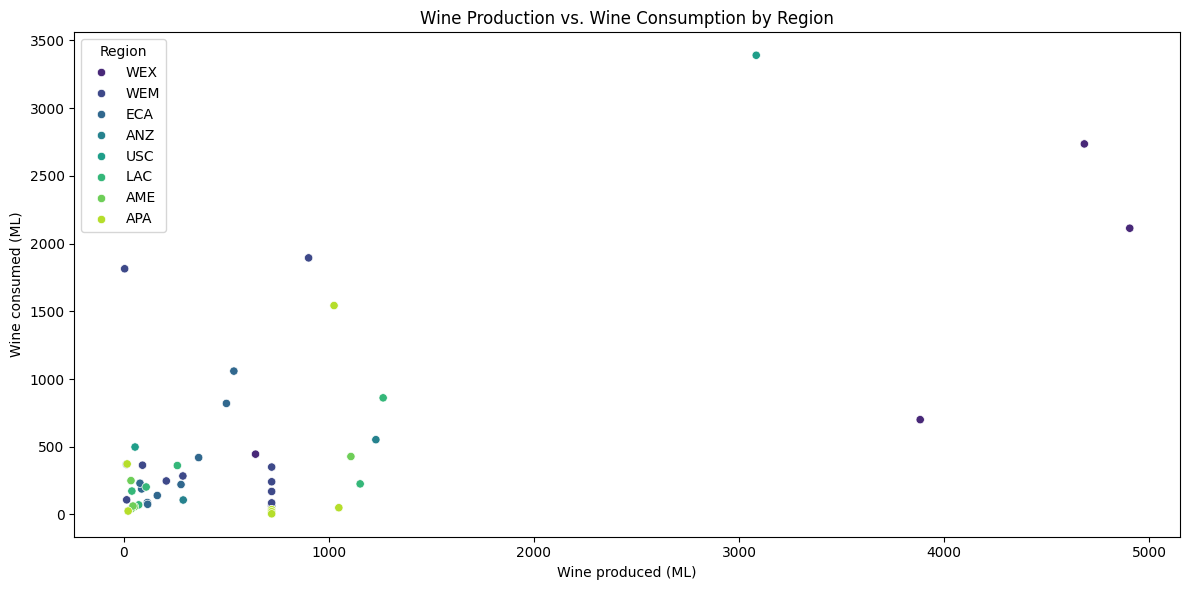

In [104]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Wine produced (ML)', y='Wine consumed (ML)', hue='Region', data=df, palette='viridis')
plt.title('Wine Production vs. Wine Consumption by Region')
plt.tight_layout()

# Market Segmentation

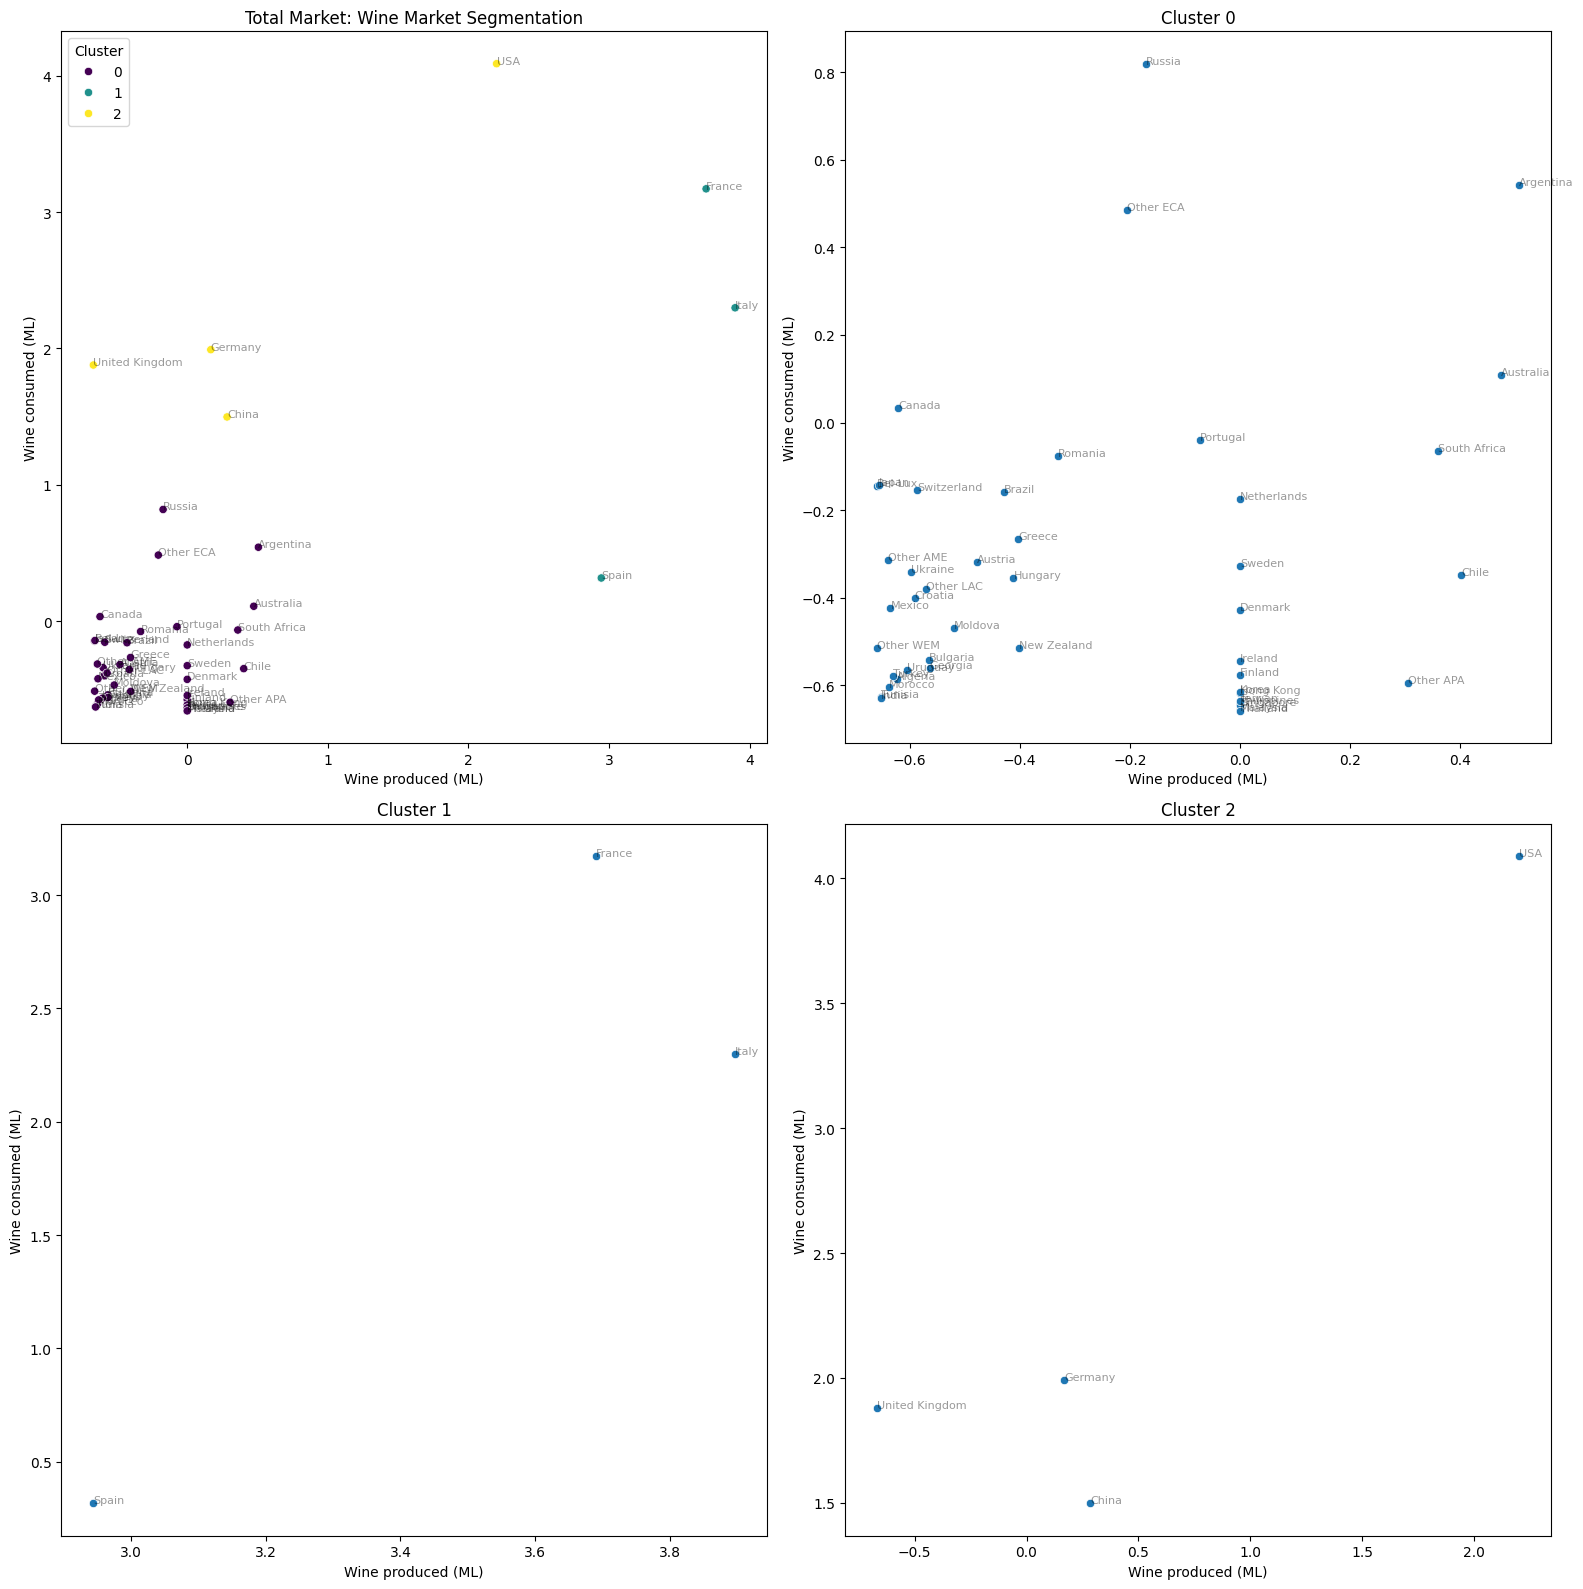

In [65]:
# Select relevant features for clustering
features = wine_data_cleaned[['Vine Area (\'000 ha)', 'Wine produced (ML)', 'Wine consumed (ML)', 
                              'Wine expenditure (US$m 2015)', 'Per capita wine expenditure (US$ 2015)', 
                              'Wine export vol. (ML)', 'Wine import vol. (ML)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the original dataset
wine_data_cleaned['Cluster'] = clusters

df['Cluster'] = clusters

# Evaluate the clusters
silhouette_avg = silhouette_score(features, clusters)
#print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Wine produced (ML)', y='Wine consumed (ML)', hue='Cluster', data=wine_data_cleaned, palette='viridis')

# Annotate each point with the country name
for i in range(wine_data_cleaned.shape[0]):
    plt.text(
        x=wine_data_cleaned['Wine produced (ML)'][i],
        y=wine_data_cleaned['Wine consumed (ML)'][i],
        s=wine_data_cleaned['Country'][i],
        fontdict=dict(color='black', size=8),
        alpha = 0.4
        #bbox=dict(facecolor='yellow', alpha=0.5)
    )

plt.title('Total Market: Wine Market Segmentation')
plt.xlabel('Wine produced (ML)')
plt.ylabel('Wine consumed (ML)')
plt.legend(title='Cluster', loc = 'upper left')



plt.subplot(2, 2, 2)
tmp = wine_data_cleaned[wine_data_cleaned['Cluster'] == 0]
sns.scatterplot(x='Wine produced (ML)', y='Wine consumed (ML)', data=tmp)

# Annotate each point with the country name
for i, row in tmp.iterrows():
    plt.text(
        x=row['Wine produced (ML)'],
        y=row['Wine consumed (ML)'],
        s=row['Country'],
        fontdict=dict(color='black', size=8),
        alpha = 0.4
        #bbox=dict(facecolor='yellow', alpha=0.5)
    )

plt.title('Cluster 0')
plt.xlabel('Wine produced (ML)')
plt.ylabel('Wine consumed (ML)')




plt.subplot(2, 2, 3)
tmp = wine_data_cleaned[wine_data_cleaned['Cluster'] == 1]
sns.scatterplot(x='Wine produced (ML)', y='Wine consumed (ML)', data=tmp)

# Annotate each point with the country name
for i, row in tmp.iterrows():
    plt.text(
        x=row['Wine produced (ML)'],
        y=row['Wine consumed (ML)'],
        s=row['Country'],
        fontdict=dict(color='black', size=8),
        alpha = 0.4
        #bbox=dict(facecolor='yellow', alpha=0.5)
    )

plt.title('Cluster 1')
plt.xlabel('Wine produced (ML)')
plt.ylabel('Wine consumed (ML)')



plt.subplot(2, 2, 4)
tmp = wine_data_cleaned[wine_data_cleaned['Cluster'] == 2]
sns.scatterplot(x='Wine produced (ML)', y='Wine consumed (ML)', data=tmp)

# Annotate each point with the country name
for i, row in tmp.iterrows():
    plt.text(
        x=row['Wine produced (ML)'],
        y=row['Wine consumed (ML)'],
        s=row['Country'],
        fontdict=dict(color='black', size=8),
        alpha = 0.4
        #bbox=dict(facecolor='yellow', alpha=0.5)
    )

plt.title('Cluster 2')
plt.xlabel('Wine produced (ML)')
plt.ylabel('Wine consumed (ML)')



plt.tight_layout()

## Data Summary by Cluster

In [64]:
df.groupby('Cluster').mean(numeric_only = True).transpose()

Cluster,0,1,2
Vine Area ('000 ha),80.99,814.56,375.74
Cropland under vines (%),1.45,5.68,0.44
Wine produced (ML),422.36,"4,490.77","1,253.58"
Wine consumed (ML),232.69,"1,849.66","2,160.22"
Wine consumed (l/capita),13.74,30.22,15.67
Wine expenditure (US$m 2015),"2,561.35","17,759.23","30,133.42"
Per capita wine expenditure (US$ 2015),151.01,292.50,179.43
Population (millions),117.61,58.14,493.59
GDP (billion US$ real 1990),674.13,"1,111.25","8,355.81"
GDP per capita ('000 US$),15.61,18.78,22.99


# Geographic Analysis

In [76]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the wine data with the world map
wine_data_geo = world.merge(df, how='left', left_on='name', right_on='Country')

# Create a choropleth map for wine production
map_production = folium.Map(location=[20, 0], zoom_start=2)
folium.Choropleth(
    geo_data=wine_data_geo,
    name='choropleth',
    data=wine_data_geo,
    columns=['Country', 'Wine produced (ML)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Wine produced (ML)'
).add_to(map_production)

# Create a choropleth map for wine consumption
map_consumption = folium.Map(location=[20, 0], zoom_start=2)
folium.Choropleth(
    geo_data=wine_data_geo,
    name='choropleth',
    data=wine_data_geo,
    columns=['Country', 'Wine consumed (ML)'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Wine consumed (ML)'
).add_to(map_consumption)

# Save the maps as HTML files
map_production.save('data/map_wine_production.html')
map_consumption.save('data/map_wine_consumption.html')

/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_6500/851309813.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Competitive Analysis

## Market Share

In [81]:
# Calculate market share for wine production
df['Production Market Share (%)'] = (df['Wine produced (ML)'] / df['Wine produced (ML)'].sum()) * 100

# Calculate market share for wine consumption
df['Consumption Market Share (%)'] = (df['Wine consumed (ML)'] / df['Wine consumed (ML)'].sum()) * 100

In [82]:
# Display top 10 countries by production market share
top_producers = df.sort_values(by='Production Market Share (%)', ascending=False).head(10)
top_producers[['Country', 'Production Market Share (%)']]

,Country,Production Market Share (%)
1,Italy,13.08
0,France,12.49
3,Spain,10.36
28,USA,8.23
29,Argentina,3.37
25,Australia,3.28
31,Chile,3.07
37,South Africa,2.95
51,Other APA,2.80
41,China,2.73


In [83]:
# Display top 10 countries by consumption market share
top_consumers = df.sort_values(by='Consumption Market Share (%)', ascending=False).head(10)
top_consumers[['Country', 'Consumption Market Share (%)']]

,Country,Consumption Market Share (%)
28,USA,13.75
0,France,11.09
1,Italy,8.57
8,Germany,7.68
14,United Kingdom,7.36
41,China,6.25
22,Russia,4.29
29,Argentina,3.49
24,Other ECA,3.32
3,Spain,2.84


## Export-Import Market Share

In [77]:
# Top 10 exporting countries by volume
top_exporters_volume = df.sort_values(by='Wine export vol. (ML)', ascending=False).head(10)
top_exporters_volume[['Country', 'Wine export vol. (ML)']]

,Country,Wine export vol. (ML)
3,Spain,"2,349.98"
1,Italy,"2,082.89"
0,France,"1,443.88"
31,Chile,866.11
25,Australia,739.53
28,USA,569.39
37,South Africa,423.67
8,Germany,373.79
2,Portugal,280.79
29,Argentina,265.41


In [78]:
# Top 10 exporting countries by value
top_exporters_value = df.sort_values(by='Value of wine exports (US$ mill)', ascending=False).head(10)
top_exporters_value[['Country', 'Value of wine exports (US$ mill)']]

,Country,Value of wine exports (US$ mill)
0,France,"9,523.90"
1,Italy,"6,378.42"
3,Spain,"3,181.53"
28,USA,"2,095.26"
31,Chile,"1,850.67"
25,Australia,"1,671.10"
8,Germany,"1,147.21"
26,New Zealand,"1,108.86"
14,United Kingdom,918.29
2,Portugal,861.46


In [79]:
# Top 10 importing countries by volume
top_importers_volume = df.sort_values(by='Wine import vol. (ML)', ascending=False).head(10)
top_importers_volume[['Country', 'Wine import vol. (ML)']]

,Country,Wine import vol. (ML)
14,United Kingdom,"1,946.23"
8,Germany,"1,516.10"
28,USA,"1,469.91"
0,France,733.41
24,Other ECA,597.67
22,Russia,526.37
41,China,524.55
11,Netherlands,412.53
27,Canada,404.68
5,Bel-Lux,328.67


In [80]:
# Top 10 importing countries by value
top_importers_value = df.sort_values(by='Value of wine imports (US$ mill)', ascending=False).head(10)
top_importers_value[['Country', 'Value of wine imports (US$ mill)']]

,Country,Value of wine imports (US$ mill)
28,USA,"7,608.14"
14,United Kingdom,"5,918.05"
8,Germany,"2,987.03"
41,China,"1,969.23"
27,Canada,"1,836.99"
44,Japan,"1,516.35"
13,Switzerland,"1,482.02"
11,Netherlands,"1,355.00"
42,Hong Kong,"1,344.30"
5,Bel-Lux,"1,194.37"


## Comparative Analysis

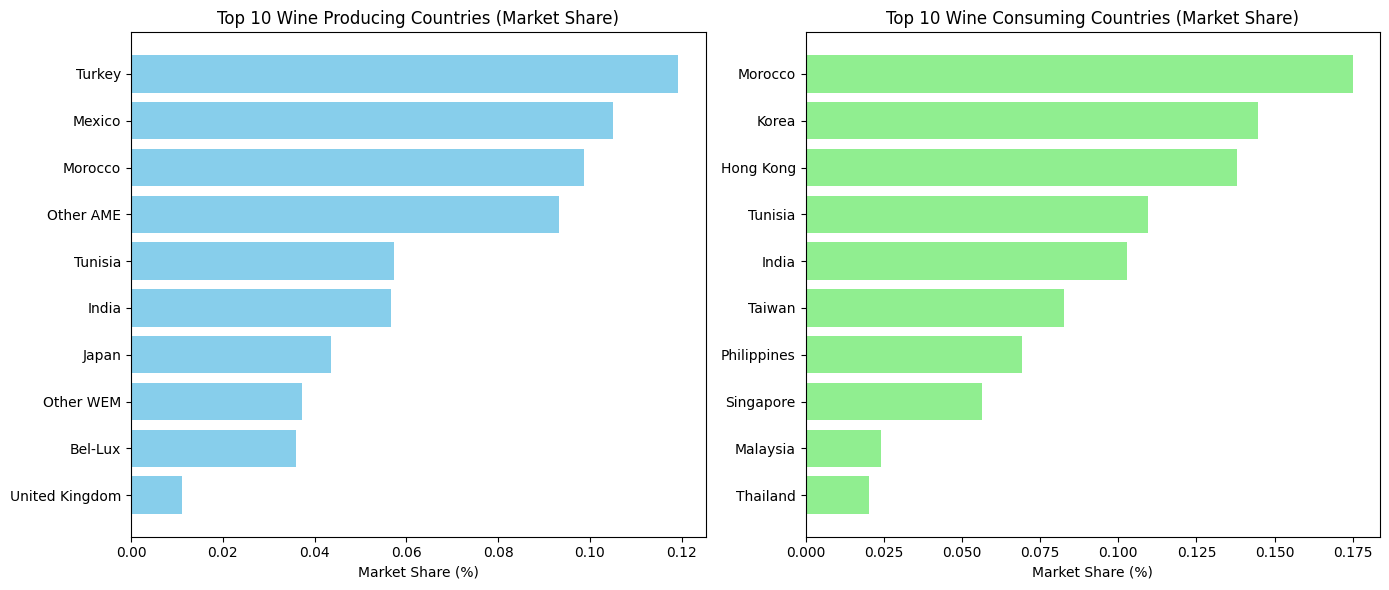

In [89]:
# Plot top 10 producers and consumers
plt.figure(figsize=(14, 6))

# Top producers
top_producers = df.sort_values(by='Production Market Share (%)', ascending=True).head(10)

plt.subplot(1, 2, 1)
plt.barh(top_producers['Country'], top_producers['Production Market Share (%)'], color='skyblue')
plt.title('Top 10 Wine Producing Countries (Market Share)')
plt.xlabel('Market Share (%)')

# Top consumers
plt.subplot(1, 2, 2)
top_consumers = df.sort_values(by='Consumption Market Share (%)', ascending=True).head(10)

plt.barh(top_consumers['Country'], top_consumers['Consumption Market Share (%)'], color='lightgreen')
plt.title('Top 10 Wine Consuming Countries (Market Share)')
plt.xlabel('Market Share (%)')

plt.tight_layout()
plt.show()

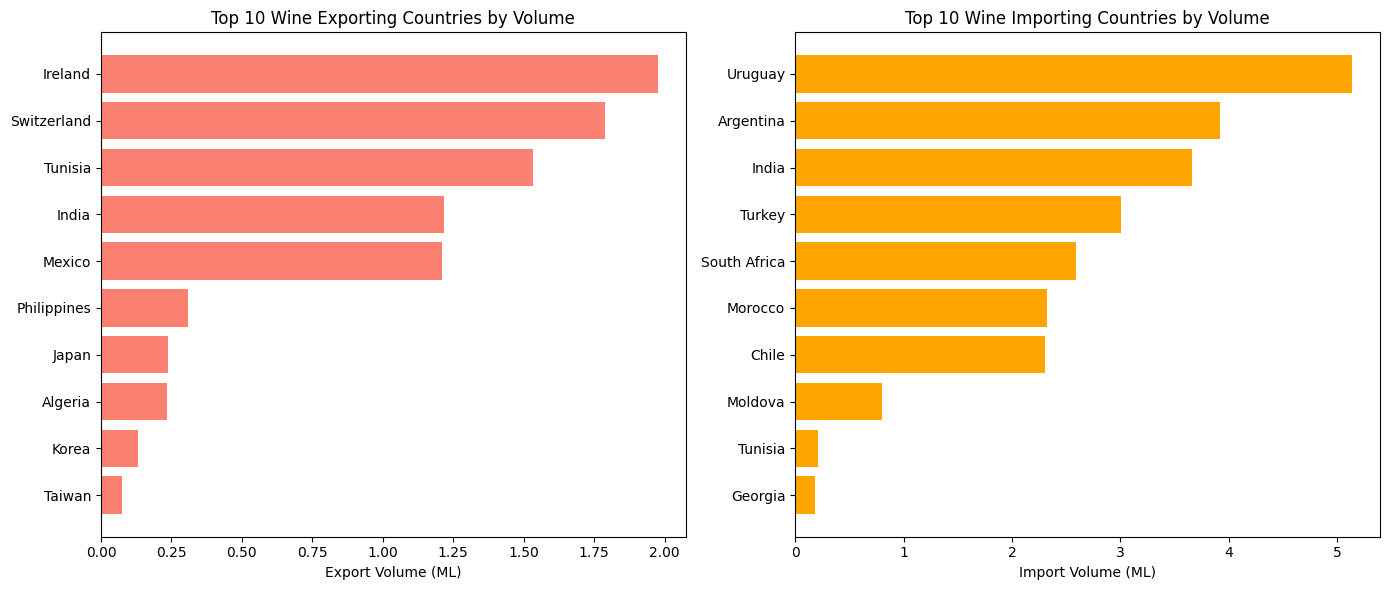

In [90]:

# Plot top 10 exporters and importers by volume
plt.figure(figsize=(14, 6))

# Top exporters by volume
plt.subplot(1, 2, 1)
top_exporters_volume = df.sort_values(by='Wine export vol. (ML)', ascending=True).head(10)
plt.barh(top_exporters_volume['Country'], top_exporters_volume['Wine export vol. (ML)'], color='salmon')
plt.title('Top 10 Wine Exporting Countries by Volume')
plt.xlabel('Export Volume (ML)')

# Top importers by volume
plt.subplot(1, 2, 2)
top_importers_volume = df.sort_values(by='Wine import vol. (ML)', ascending=True).head(10)
plt.barh(top_importers_volume['Country'], top_importers_volume['Wine import vol. (ML)'], color='orange')
plt.title('Top 10 Wine Importing Countries by Volume')
plt.xlabel('Import Volume (ML)')

plt.tight_layout()
plt.show()
